# Predicting Restaurant Closures
## Team KG
### Hongju Lee (hongjlee), Jungseo Lee (jungseo), Elizabeth Park (lizpark)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
df = pd.read_csv('./Data/df.csv')

In [4]:
df = df.loc[:,df.columns != "Unnamed: 0"]

In [5]:
df

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,attributes,categories,hours,is_open,review_count_2022,rating_2022
0,pQeaRpvuhoEqudo3uymHIQ,the empanadas house,404 e green st,Champaign,IL,61820,40.110446,-88.233073,4.5,5,"{'RestaurantsAttire': ""u'casual'"", 'Restaurant...","Ethnic Food, Food Trucks, Specialty Food, Impo...","{'Monday': '11:30-14:30', 'Tuesday': '11:30-14...",1.0,8.0,4.5
1,M_guz7Dj7hX0evS672wIwA,chocolate shoppe ice cream,2831 parmenter st,Middleton,WI,53562,43.105310,-89.510142,3.5,6,"{'BikeParking': 'True', 'Caters': 'True', 'Whe...","Desserts, Food, Ice Cream & Frozen Yogurt","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ...",1.0,12.0,3.5
2,mKTq1T_IAplDpHUcMzOXkw,tipsy ryde,NaN,Gastonia,NC,28054,35.252842,-81.152698,3.5,3,{'BusinessAcceptsCreditCards': 'True'},"Hotels & Travel, Transportation, Taxis, Beer, ...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1.0,4.0,4.0
3,eBEfgOPG7pvFhb2wcG9I7w,philthy phillys,"15480 bayview avenue, unit d0110",Aurora,ON,L4G 7J1,44.010962,-79.448677,4.5,4,"{'RestaurantsTableService': 'False', 'Restaura...","Restaurants, Cheesesteaks, Poutineries","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1.0,7.0,4.0
4,lu7vtrp_bE9PnxWfA8g4Pg,banzai sushi,300 john street,Thornhill,ON,L3T 5W4,43.820492,-79.398466,4.5,7,"{'GoodForKids': 'True', 'RestaurantsTakeOut': ...","Japanese, Fast Food, Food Court, Restaurants",NaN,0.0,7.0,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56880,cmsAFAymfVoBitSF8R6GKw,yao fine chinese cuisine,"2487 s gilbert rd, ste 102",Gilbert,AZ,85295,33.304935,-111.788861,4.0,230,"{'RestaurantsGoodForGroups': 'True', 'Ambience...","Chinese, Restaurants","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",1.0,289.0,4.0
56881,n2BKYb8aw4AhRKLkdUjQRg,steak & cheese & quick pita restaurant,199 college st,Toronto,ON,M5T 1P9,43.658683,-79.395071,2.5,21,"{'OutdoorSeating': 'False', 'Alcohol': ""u'none...","Sandwiches, Restaurants",NaN,0.0,23.0,2.5
56882,YZeUH6zYS0dq5QHLYZhUnQ,hooters,2820 n 75th ave,Phoenix,AZ,85035,33.479139,-112.221142,2.0,106,"{'NoiseLevel': ""'very_loud'"", 'WiFi': ""'no'"", ...","Nightlife, American (Traditional), Chicken Win...",NaN,1.0,128.0,2.0
56883,hskVqZCPqy-omm9CHi44xQ,domino's,"6420 rea rd, suite b1",Charlotte,NC,28226,35.078538,-80.818358,2.0,16,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Restaurants, Pizza, Sandwiches, Fast Food, Chi...","{'Monday': '10:30-0:0', 'Tuesday': '10:30-0:0'...",1.0,35.0,2.0


In [6]:
# Drop data if there is no is_open values
df = df[df['is_open'].notnull()]
df.shape

(56504, 16)

In [7]:
# Only US datasets
df = df.loc[(df['state'] == 'IL') | (df['state'] == 'WI') | 
            (df['state'] == 'NC') | (df['state'] == 'AZ') | 
            (df['state'] == 'OH') | (df['state'] == 'PA') | 
            (df['state'] == 'NV') | (df['state'] == 'SC') | 
            (df['state'] == 'TX') | (df['state'] == 'CO') | 
            (df['state'] == 'NY') | (df['state'] == 'FL') | 
            (df['state'] == 'VT') | (df['state'] == 'HI') | 
            (df['state'] == 'OR') | (df['state'] == 'WA') | 
            (df['state'] == 'CA') | (df['state'] == 'VA') | 
            (df['state'] == 'NE') | (df['state'] == 'MO')]

In [8]:
# Make new column: review_count_change from review_count_2022 - review_count
df = df.copy()
df['review_count_2022'] = df['review_count_2022'].fillna(0)
df['review_count'] = df['review_count'].fillna(0)

In [9]:
df['review_change'] = df['review_count_2022'].astype(int) - df['review_count'].astype(int)

In [10]:
# Make new column: rating_change from rating_2022 - rating
df['rating_change'] = df['rating_2022'] - df['stars']
df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,attributes,categories,hours,is_open,review_count_2022,rating_2022,review_change,rating_change
0,pQeaRpvuhoEqudo3uymHIQ,the empanadas house,404 e green st,Champaign,IL,61820,40.110446,-88.233073,4.5,5,"{'RestaurantsAttire': ""u'casual'"", 'Restaurant...","Ethnic Food, Food Trucks, Specialty Food, Impo...","{'Monday': '11:30-14:30', 'Tuesday': '11:30-14...",1.0,8.0,4.5,3,0.0
1,M_guz7Dj7hX0evS672wIwA,chocolate shoppe ice cream,2831 parmenter st,Middleton,WI,53562,43.105310,-89.510142,3.5,6,"{'BikeParking': 'True', 'Caters': 'True', 'Whe...","Desserts, Food, Ice Cream & Frozen Yogurt","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ...",1.0,12.0,3.5,6,0.0
2,mKTq1T_IAplDpHUcMzOXkw,tipsy ryde,NaN,Gastonia,NC,28054,35.252842,-81.152698,3.5,3,{'BusinessAcceptsCreditCards': 'True'},"Hotels & Travel, Transportation, Taxis, Beer, ...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1.0,4.0,4.0,1,0.5
7,vjTVxnsQEZ34XjYNS-XUpA,wetzel's pretzels,"4550 east cactus rd, #ksfc-4",Phoenix,AZ,85032,33.602822,-111.983533,4.0,10,"{'GoodForKids': 'True', 'RestaurantsTakeOut': ...","Food, Pretzels, Bakeries, Fast Food, Restaurants","{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'...",0.0,11.0,4.0,1,0.0
11,tLpkSwdtqqoXwU0JAGnApw,wendy's,4602 northfield road,Cleveland,OH,44128,41.434614,-81.527026,3.5,7,"{'RestaurantsDelivery': 'False', 'BusinessAcce...","Restaurants, Fast Food, Burgers","{'Monday': '10:0-3:0', 'Tuesday': '10:0-3:0', ...",1.0,14.0,2.0,7,-1.5


In [11]:
# Make new column: num_categories
def num_categories (row):
    categories = row['categories']
    num_categories = len(categories.split(', '))
    return num_categories

In [12]:
df['num_categories'] = df.apply(num_categories, axis=1)
df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,attributes,categories,hours,is_open,review_count_2022,rating_2022,review_change,rating_change,num_categories
0,pQeaRpvuhoEqudo3uymHIQ,the empanadas house,404 e green st,Champaign,IL,61820,40.110446,-88.233073,4.5,5,"{'RestaurantsAttire': ""u'casual'"", 'Restaurant...","Ethnic Food, Food Trucks, Specialty Food, Impo...","{'Monday': '11:30-14:30', 'Tuesday': '11:30-14...",1.0,8.0,4.5,3,0.0,8
1,M_guz7Dj7hX0evS672wIwA,chocolate shoppe ice cream,2831 parmenter st,Middleton,WI,53562,43.105310,-89.510142,3.5,6,"{'BikeParking': 'True', 'Caters': 'True', 'Whe...","Desserts, Food, Ice Cream & Frozen Yogurt","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ...",1.0,12.0,3.5,6,0.0,3
2,mKTq1T_IAplDpHUcMzOXkw,tipsy ryde,NaN,Gastonia,NC,28054,35.252842,-81.152698,3.5,3,{'BusinessAcceptsCreditCards': 'True'},"Hotels & Travel, Transportation, Taxis, Beer, ...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1.0,4.0,4.0,1,0.5,7
7,vjTVxnsQEZ34XjYNS-XUpA,wetzel's pretzels,"4550 east cactus rd, #ksfc-4",Phoenix,AZ,85032,33.602822,-111.983533,4.0,10,"{'GoodForKids': 'True', 'RestaurantsTakeOut': ...","Food, Pretzels, Bakeries, Fast Food, Restaurants","{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'...",0.0,11.0,4.0,1,0.0,5
11,tLpkSwdtqqoXwU0JAGnApw,wendy's,4602 northfield road,Cleveland,OH,44128,41.434614,-81.527026,3.5,7,"{'RestaurantsDelivery': 'False', 'BusinessAcce...","Restaurants, Fast Food, Burgers","{'Monday': '10:0-3:0', 'Tuesday': '10:0-3:0', ...",1.0,14.0,2.0,7,-1.5,3


##### Seperate Attributes Column

In [13]:
df = df.replace(np.nan, 'None', regex = True)
attributes = df["attributes"].apply(lambda x: ast.literal_eval(x))
attributes = attributes.apply(pd.Series)
attributes

,RestaurantsAttire,RestaurantsTakeOut,BusinessAcceptsCreditCards,NoiseLevel,GoodForKids,RestaurantsReservations,RestaurantsGoodForGroups,BusinessParking,RestaurantsPriceRange2,HasTV,...,Smoking,CoatCheck,BYOB,BYOBCorkage,Corkage,AgesAllowed,RestaurantsCounterService,DietaryRestrictions,Open24Hours,HairSpecializesIn
0,u'casual',True,True,u'quiet',False,False,False,None,1,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,True,True,NaN,NaN,NaN,NaN,"{'garage': False, 'street': True, 'validated':...",1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,u'casual',True,True,NaN,True,False,True,"{'garage': False, 'street': False, 'validated'...",1,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,u'casual',True,True,u'average',True,False,True,"{'garage': False, 'street': False, 'validated'...",1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56878,u'formal',True,True,u'very_loud',True,False,True,"{'garage': False, 'street': False, 'validated'...",4,True,...,NaN,NaN,NaN,'yes_free',False,NaN,NaN,NaN,NaN,NaN
56880,u'casual',True,True,'average',True,False,True,"{'garage': False, 'street': False, 'validated'...",1,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56882,u'casual',True,True,'very_loud',True,False,True,"{'garage': False, 'street': False, 'validated'...",2,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56883,u'casual',True,True,NaN,True,False,True,"{'garage': False, 'street': False, 'validated'...",1,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Split parking to multiple columns
attributes["BusinessParking"] = attributes["BusinessParking"].replace(np.nan, 'None', regex = True)
attributes_parking = attributes["BusinessParking"].apply(lambda x: ast.literal_eval(x))
attributes_parking = attributes_parking.apply(pd.Series)
attributes_parking = attributes_parking.add_prefix('Parking_')
attributes_parking

,Parking_garage,Parking_street,Parking_validated,Parking_lot,Parking_valet
0,NaN,NaN,NaN,NaN,NaN
1,False,True,False,True,False
2,NaN,NaN,NaN,NaN,NaN
7,False,False,False,True,False
11,False,False,False,True,False
...,...,...,...,...,...
56878,False,False,False,False,False
56880,False,False,False,None,False
56882,False,False,False,True,False
56883,False,False,False,True,False


In [15]:
def clean_attributes(df):
    #replace none to nan in RestaurantsPriceRange2 column
    #df['RestaurantsPriceRange2'].replace('None', np.nan, inplace=True)

    #Get dataframe where row in 'RestaurantsPriceRange2' column is not nan
    #df = df[df['RestaurantsPriceRange2'].notna()]

    #Replacing nan with 'none' string
    df = df.replace(np.nan, 'None', regex = True)

    #remove starting 'u'
    df = df.applymap(lambda x: x.lstrip('u'))

    #remove '' in dataframe
    df = df.replace("[']", "", regex = True)

    #Replacing none with nan string
    df = df.replace('None', np.nan, regex = True)

    return df

attributes_cleaned = clean_attributes(attributes)
attributes_cleaned

,RestaurantsAttire,RestaurantsTakeOut,BusinessAcceptsCreditCards,NoiseLevel,GoodForKids,RestaurantsReservations,RestaurantsGoodForGroups,BusinessParking,RestaurantsPriceRange2,HasTV,...,Smoking,CoatCheck,BYOB,BYOBCorkage,Corkage,AgesAllowed,RestaurantsCounterService,DietaryRestrictions,Open24Hours,HairSpecializesIn
0,casual,True,True,quiet,False,False,False,NaN,1,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,True,True,NaN,NaN,NaN,NaN,"{garage: False, street: True, validated: False...",1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,casual,True,True,NaN,True,False,True,"{garage: False, street: False, validated: Fals...",1,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,casual,True,True,average,True,False,True,"{garage: False, street: False, validated: Fals...",1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56878,formal,True,True,very_loud,True,False,True,"{garage: False, street: False, validated: Fals...",4,True,...,NaN,NaN,NaN,yes_free,False,NaN,NaN,NaN,NaN,NaN
56880,casual,True,True,average,True,False,True,NaN,1,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56882,casual,True,True,very_loud,True,False,True,"{garage: False, street: False, validated: Fals...",2,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56883,casual,True,True,NaN,True,False,True,"{garage: False, street: False, validated: Fals...",1,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#combine parking df and original
attributes_final = attributes_cleaned.join(attributes_parking)

attributes_final.columns

Index(['RestaurantsAttire', 'RestaurantsTakeOut', 'BusinessAcceptsCreditCards',
       'NoiseLevel', 'GoodForKids', 'RestaurantsReservations',
       'RestaurantsGoodForGroups', 'BusinessParking', 'RestaurantsPriceRange2',
       'HasTV', 'Alcohol', 'BikeParking', 'RestaurantsDelivery',
       'ByAppointmentOnly', 'OutdoorSeating', 'Caters', 'WheelchairAccessible',
       'WiFi', 'Ambience', 'GoodForMeal', 'RestaurantsTableService',
       'DriveThru', 'DogsAllowed', 'HappyHour', 'BusinessAcceptsBitcoin',
       'AcceptsInsurance', 'Music', 'BestNights', 'GoodForDancing', 'Smoking',
       'CoatCheck', 'BYOB', 'BYOBCorkage', 'Corkage', 'AgesAllowed',
       'RestaurantsCounterService', 'DietaryRestrictions', 'Open24Hours',
       'HairSpecializesIn', 'Parking_garage', 'Parking_street',
       'Parking_validated', 'Parking_lot', 'Parking_valet'],
      dtype='object')

In [17]:
# Take out needed attributes columns
attributes_needed = attributes_final[['OutdoorSeating', 'RestaurantsDelivery','BikeParking', 'Parking_street', 'Parking_lot',
                          'Parking_validated', 'Parking_garage', 'RestaurantsPriceRange2', 'RestaurantsTakeOut', 'Parking_valet',
                          'BusinessAcceptsCreditCards']]

In [18]:
# add PriceRange2 from attributes to the original df
df.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'attributes',
       'categories', 'hours', 'is_open', 'review_count_2022', 'rating_2022',
       'review_change', 'rating_change', 'num_categories'],
      dtype='object')

In [19]:
attributes_pricerange = attributes_needed.RestaurantsPriceRange2

In [20]:
df['price_range'] = attributes_pricerange

In [21]:
df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,attributes,categories,hours,is_open,review_count_2022,rating_2022,review_change,rating_change,num_categories,price_range
0,pQeaRpvuhoEqudo3uymHIQ,the empanadas house,404 e green st,Champaign,IL,61820,40.110446,-88.233073,4.5,5,"{'RestaurantsAttire': ""u'casual'"", 'Restaurant...","Ethnic Food, Food Trucks, Specialty Food, Impo...","{'Monday': '11:30-14:30', 'Tuesday': '11:30-14...",1.0,8.0,4.5,3,0.0,8,1
1,M_guz7Dj7hX0evS672wIwA,chocolate shoppe ice cream,2831 parmenter st,Middleton,WI,53562,43.105310,-89.510142,3.5,6,"{'BikeParking': 'True', 'Caters': 'True', 'Whe...","Desserts, Food, Ice Cream & Frozen Yogurt","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ...",1.0,12.0,3.5,6,0.0,3,1
2,mKTq1T_IAplDpHUcMzOXkw,tipsy ryde,None,Gastonia,NC,28054,35.252842,-81.152698,3.5,3,{'BusinessAcceptsCreditCards': 'True'},"Hotels & Travel, Transportation, Taxis, Beer, ...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1.0,4.0,4.0,1,0.5,7,NaN
7,vjTVxnsQEZ34XjYNS-XUpA,wetzel's pretzels,"4550 east cactus rd, #ksfc-4",Phoenix,AZ,85032,33.602822,-111.983533,4.0,10,"{'GoodForKids': 'True', 'RestaurantsTakeOut': ...","Food, Pretzels, Bakeries, Fast Food, Restaurants","{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'...",0.0,11.0,4.0,1,0.0,5,1
11,tLpkSwdtqqoXwU0JAGnApw,wendy's,4602 northfield road,Cleveland,OH,44128,41.434614,-81.527026,3.5,7,"{'RestaurantsDelivery': 'False', 'BusinessAcce...","Restaurants, Fast Food, Burgers","{'Monday': '10:0-3:0', 'Tuesday': '10:0-3:0', ...",1.0,14.0,2.0,7,-1.5,3,1


In [22]:
df.shape

(33955, 20)

##### attributes_needed dimension reduction

In [23]:
attributes_needed.shape

(33955, 11)

In [24]:
# Check num of NaN values
attributes_needed.isna().sum()

OutdoorSeating                10893
RestaurantsDelivery           10190
BikeParking                    8128
Parking_street                 4877
Parking_lot                    4837
Parking_validated              4681
Parking_garage                 4674
RestaurantsPriceRange2         4452
RestaurantsTakeOut             4565
Parking_valet                  4258
BusinessAcceptsCreditCards     2681
dtype: int64

In [25]:
# Take out OutdoorSeating, RestaurantsDelivery, BikeParking
attributes_needed = attributes_needed[['Parking_street', 'Parking_lot', 'Parking_validated', 'Parking_garage',
        'RestaurantsTakeOut', 'Parking_valet',
       'BusinessAcceptsCreditCards']]

In [26]:
for col in attributes_needed:
    print (attributes_needed[col].unique())

[nan True False None]
[nan True False None]
[nan False True None]
[nan False True None]
['True' nan 'False']
[nan False True]
['True' 'False' nan]


In [27]:
attributes_needed = attributes_needed.astype(str)

In [28]:
for col in attributes_needed:
    print (attributes_needed[col].unique())

['nan' 'True' 'False' 'None']
['nan' 'True' 'False' 'None']
['nan' 'False' 'True' 'None']
['nan' 'False' 'True' 'None']
['True' 'nan' 'False']
['nan' 'False' 'True']
['True' 'False' 'nan']


In [29]:
# Fill out NaN values
attributes_needed = attributes_needed.replace('False', 0, regex=True)
attributes_needed = attributes_needed.replace('True', 1, regex=True)

## NaN values --> 2
attributes_needed = attributes_needed.replace('nan', 2, regex=True)
attributes_needed = attributes_needed.replace('None', 2, regex=True)

In [30]:
for col in attributes_needed:
    print (attributes_needed[col].unique())

[2 1 0]
[2 1 0]
[2 0 1]
[2 0 1]
[1 2 0]
[2 0 1]
[1 0 2]


In [31]:
attributes_needed.columns

Index(['Parking_street', 'Parking_lot', 'Parking_validated', 'Parking_garage',
       'RestaurantsTakeOut', 'Parking_valet', 'BusinessAcceptsCreditCards'],
      dtype='object')

In [32]:
#### One hot encoding

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

# creating instance of one-hot-encoder
transformer = make_column_transformer((OneHotEncoder(handle_unknown='ignore', sparse=False), ['Parking_street', 'Parking_lot', 'Parking_validated', 'Parking_garage',
       'RestaurantsTakeOut', 'Parking_valet', 'BusinessAcceptsCreditCards']),remainder='passthrough')

transformed = transformer.fit_transform(attributes_needed)
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names())

transformed_df

,onehotencoder__x0_0,onehotencoder__x0_1,onehotencoder__x0_2,onehotencoder__x1_0,onehotencoder__x1_1,onehotencoder__x1_2,onehotencoder__x2_0,onehotencoder__x2_1,onehotencoder__x2_2,onehotencoder__x3_0,...,onehotencoder__x3_2,onehotencoder__x4_0,onehotencoder__x4_1,onehotencoder__x4_2,onehotencoder__x5_0,onehotencoder__x5_1,onehotencoder__x5_2,onehotencoder__x6_0,onehotencoder__x6_1,onehotencoder__x6_2
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33950,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
33951,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
33952,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
33953,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [33]:
# dimension reduction
from sklearn.decomposition import TruncatedSVD
# Reduced to 3 components
svd = TruncatedSVD(n_components=3)
svd_encoding = pd.DataFrame(svd.fit_transform(transformed_df))
svd_encoding

,0,1,2
0,0.860385,2.401451,-0.136501
1,2.258178,-0.010611,-0.436781
2,0.532139,2.420938,0.009162
3,2.561379,-0.129942,-0.639199
4,2.561379,-0.129942,-0.639199
...,...,...,...
33950,2.507571,-0.094888,0.734801
33951,2.350815,0.354509,0.002454
33952,2.561379,-0.129942,-0.639199
33953,2.561379,-0.129942,-0.639199


In [34]:
df = df.reset_index(drop=True)

In [35]:
# Combine reduced attributes features to the original df
df2 = df.join(svd_encoding)

In [36]:
df2.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,is_open,review_count_2022,rating_2022,review_change,rating_change,num_categories,price_range,0,1,2
0,pQeaRpvuhoEqudo3uymHIQ,the empanadas house,404 e green st,Champaign,IL,61820,40.110446,-88.233073,4.5,5,...,1.0,8.0,4.5,3,0.0,8,1,0.860385,2.401451,-0.136501
1,M_guz7Dj7hX0evS672wIwA,chocolate shoppe ice cream,2831 parmenter st,Middleton,WI,53562,43.105310,-89.510142,3.5,6,...,1.0,12.0,3.5,6,0.0,3,1,2.258178,-0.010611,-0.436781
2,mKTq1T_IAplDpHUcMzOXkw,tipsy ryde,None,Gastonia,NC,28054,35.252842,-81.152698,3.5,3,...,1.0,4.0,4.0,1,0.5,7,NaN,0.532139,2.420938,0.009162
3,vjTVxnsQEZ34XjYNS-XUpA,wetzel's pretzels,"4550 east cactus rd, #ksfc-4",Phoenix,AZ,85032,33.602822,-111.983533,4.0,10,...,0.0,11.0,4.0,1,0.0,5,1,2.561379,-0.129942,-0.639199
4,tLpkSwdtqqoXwU0JAGnApw,wendy's,4602 northfield road,Cleveland,OH,44128,41.434614,-81.527026,3.5,7,...,1.0,14.0,2.0,7,-1.5,3,1,2.561379,-0.129942,-0.639199


In [37]:
df2.shape

(33955, 23)

In [38]:
import ast
# Change attributes column into dictionary format
df2['attributes'] = df2['attributes'].replace(np.nan, "None", regex = True)
df2['attributes'] = df2["attributes"].apply(lambda x: ast.literal_eval(x))

In [39]:
def num_attributes(row):
    attributes = row['attributes']
    if attributes is None :
        return 0
    else:
        num = len(attributes)
        return num

In [40]:
df2['num_attributes'] = df2.apply(num_attributes, axis=1)
df2.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,review_count_2022,rating_2022,review_change,rating_change,num_categories,price_range,0,1,2,num_attributes
0,pQeaRpvuhoEqudo3uymHIQ,the empanadas house,404 e green st,Champaign,IL,61820,40.110446,-88.233073,4.5,5,...,8.0,4.5,3,0.0,8,1,0.860385,2.401451,-0.136501,15
1,M_guz7Dj7hX0evS672wIwA,chocolate shoppe ice cream,2831 parmenter st,Middleton,WI,53562,43.105310,-89.510142,3.5,6,...,12.0,3.5,6,0.0,3,1,2.258178,-0.010611,-0.436781,8
2,mKTq1T_IAplDpHUcMzOXkw,tipsy ryde,None,Gastonia,NC,28054,35.252842,-81.152698,3.5,3,...,4.0,4.0,1,0.5,7,NaN,0.532139,2.420938,0.009162,1
3,vjTVxnsQEZ34XjYNS-XUpA,wetzel's pretzels,"4550 east cactus rd, #ksfc-4",Phoenix,AZ,85032,33.602822,-111.983533,4.0,10,...,11.0,4.0,1,0.0,5,1,2.561379,-0.129942,-0.639199,14
4,tLpkSwdtqqoXwU0JAGnApw,wendy's,4602 northfield road,Cleveland,OH,44128,41.434614,-81.527026,3.5,7,...,14.0,2.0,7,-1.5,3,1,2.561379,-0.129942,-0.639199,15


In [41]:
# Add if the restaurant is a part of the chain : count the number of the same name of the restaurants 
new_df = df2['name'].value_counts().to_frame('counts')

In [42]:
new_df

,counts
starbucks,677
subway restaurants,609
mcdonald's,536
walgreens,309
taco bell,294
...,...
nine fine irishmen,1
ahipoki - phoenix,1
spaghetty western,1
two hippies beach house,1


In [43]:
fin_df = pd.merge(df2, new_df, left_on = 'name', right_on=new_df.index, how='left') 

In [44]:
# check
fin_df[fin_df.name == "mcdonald's"]

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,rating_2022,review_change,rating_change,num_categories,price_range,0,1,2,num_attributes,counts
40,CfwrsG76Wm4iLS22v_wAcg,mcdonald's,6421 pearl rd,Parma Heights,OH,44130,41.385949,-81.768113,2.5,15,...,2.0,8,-0.5,5,1,0.860385,2.401451,-0.136501,14,536
118,v3kXkK9ga8jfgetr0Hb5Eg,mcdonald's,31115 vine st,Willowick,OH,44095,41.642921,-81.469927,2.0,8,...,2.0,4,0.0,5,1,2.507571,-0.094888,0.734801,11,536
211,2SedpQ674XBqyw3Wq4kyxQ,mcdonald's,1350 s power rd,Mesa,AZ,85206,33.390766,-111.685350,1.5,29,...,2.0,35,0.5,5,1,2.507571,-0.094888,0.734801,20,536
297,uasU60jZfngLgfTppy8IPQ,mcdonald's,6501 monroe rd,Indian Trail,NC,28079,35.049266,-80.647586,1.0,21,...,1.0,14,0.0,5,1,1.788299,-0.140081,0.958178,4,536
301,zyJWc8oW8JpPg2xXMQsnAA,mcdonald's,540 marks st,Henderson,NV,89014,36.060440,-115.034113,2.0,30,...,2.0,5,0.0,5,1,2.561379,-0.129942,-0.639199,18,536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33701,7Ppgpgva-HP3o3h-xp2sWw,mcdonald's,8620 w cheyenne ave,Las Vegas,NV,89129,36.219039,-115.281441,1.5,44,...,1.5,43,0.0,6,1,2.507571,-0.094888,0.734801,15,536
33800,nqPuAhbXJWknRzUXSg8K2g,mcdonald's,1158 n higley,Mesa,AZ,85205,33.436378,-111.719571,2.0,41,...,1.5,26,-0.5,5,1,2.561379,-0.129942,-0.639199,19,536
33880,lebZM1I1gTuAzRfIBNSgdw,mcdonald's,5250 detroit rd,Elyria,OH,44035,41.425210,-82.077933,2.0,21,...,1.5,11,-0.5,5,1,2.507571,-0.094888,0.734801,17,536
33902,W39f_7mEdphd-wzGwgPxow,mcdonald's,5867 wooster pike,Medina,OH,44256,41.114057,-81.863526,3.0,13,...,2.0,12,-1.0,5,1,0.460755,2.217052,-0.115035,15,536


In [45]:
fin_df

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,rating_2022,review_change,rating_change,num_categories,price_range,0,1,2,num_attributes,counts
0,pQeaRpvuhoEqudo3uymHIQ,the empanadas house,404 e green st,Champaign,IL,61820,40.110446,-88.233073,4.5,5,...,4.5,3,0.0,8,1,0.860385,2.401451,-0.136501,15,1
1,M_guz7Dj7hX0evS672wIwA,chocolate shoppe ice cream,2831 parmenter st,Middleton,WI,53562,43.105310,-89.510142,3.5,6,...,3.5,6,0.0,3,1,2.258178,-0.010611,-0.436781,8,5
2,mKTq1T_IAplDpHUcMzOXkw,tipsy ryde,None,Gastonia,NC,28054,35.252842,-81.152698,3.5,3,...,4.0,1,0.5,7,NaN,0.532139,2.420938,0.009162,1,1
3,vjTVxnsQEZ34XjYNS-XUpA,wetzel's pretzels,"4550 east cactus rd, #ksfc-4",Phoenix,AZ,85032,33.602822,-111.983533,4.0,10,...,4.0,1,0.0,5,1,2.561379,-0.129942,-0.639199,14,15
4,tLpkSwdtqqoXwU0JAGnApw,wendy's,4602 northfield road,Cleveland,OH,44128,41.434614,-81.527026,3.5,7,...,2.0,7,-1.5,3,1,2.561379,-0.129942,-0.639199,15,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33950,AlwKuzyrrxlZ04ktebwmcA,pizza pit,13 atlas ct,Madison,WI,53714,43.086793,-89.306868,2.5,19,...,3.0,5,0.5,8,4,2.507571,-0.094888,0.734801,19,5
33951,cmsAFAymfVoBitSF8R6GKw,yao fine chinese cuisine,"2487 s gilbert rd, ste 102",Gilbert,AZ,85295,33.304935,-111.788861,4.0,230,...,4.0,59,0.0,2,1,2.350815,0.354509,0.002454,19,1
33952,YZeUH6zYS0dq5QHLYZhUnQ,hooters,2820 n 75th ave,Phoenix,AZ,85035,33.479139,-112.221142,2.0,106,...,2.0,22,0.0,6,2,2.561379,-0.129942,-0.639199,23,14
33953,hskVqZCPqy-omm9CHi44xQ,domino's,"6420 rea rd, suite b1",Charlotte,NC,28226,35.078538,-80.818358,2.0,16,...,2.0,19,0.0,5,1,2.561379,-0.129942,-0.639199,15,33


In [46]:
fin_df.isna().sum()

business_id             0
name                    0
address                 0
city                    0
state                   0
postal_code             0
latitude                0
longitude               0
stars                   0
review_count            0
attributes            669
categories              0
hours                   0
is_open                 0
review_count_2022       0
rating_2022             0
review_change           0
rating_change           0
num_categories          0
price_range          4452
0                       0
1                       0
2                       0
num_attributes          0
counts                  0
dtype: int64

In [47]:
# Fill price_range NaN values with median value
fin_df['price_range'].fillna(fin_df['price_range'].median(), inplace=True)

## Add outer source data about the city/state of the restaurant
From FBI (by city) 2019:
- Population
- Violent_crime
- Property_crime
- Burglary
- Larceny_theft...etc.

From Census (by state):
- Median gross rent, 2016-2020
- Median household income (in 2020 dollars), 2016-2020
- Race demographics percentage (White alone, Black or African American alone, American Indian and Alaska Native alone, Asian alone, Hispanic or Latino)
- Bachelor's degree or higher, percent of persons age 25 years+, 2016-2020
- Persons without health insurance, under age 65 years, percent

In [49]:
outer = pd.read_csv('./Data/outer_source_data.csv')

In [50]:
outer

,city,state,Population,Violent_crime,Murder_and_nonnegligent_manslaughter,Rape,Robbery,Aggravated_assault,Property_crime,Burglary,...,Arson,Median_gross_rent,Median_household_income,White_perc,Black_perc,AmIndAla_perc,Asian_perc,Hispanic_perc,Bach_deg_edu,Insurance_und65
0,Apache Junction,AZ,42531.0,95.0,2,12.0,14.0,67.0,NaN,NaN,...,6.0,1097,61529,82.0,5.4,5.3,3.8,32.3,30.3,87.1
1,Avondale,AZ,87117.0,251.0,1,21.0,82.0,147.0,3095.0,381.0,...,16.0,1097,61529,82.0,5.4,5.3,3.8,32.3,30.3,87.1
2,Buckeye,AZ,77904.0,107.0,2,26.0,10.0,69.0,1265.0,146.0,...,1.0,1097,61529,82.0,5.4,5.3,3.8,32.3,30.3,87.1
3,Bullhead City,AZ,40532.0,129.0,2,23.0,25.0,79.0,1352.0,235.0,...,9.0,1097,61529,82.0,5.4,5.3,3.8,32.3,30.3,87.1
4,Camp Verde,AZ,11286.0,46.0,0,3.0,0.0,43.0,265.0,62.0,...,1.0,1097,61529,82.0,5.4,5.3,3.8,32.3,30.3,87.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5231,Black Earth,WI,4346.0,4.0,0,1.0,0.0,3.0,23.0,3.0,...,0.0,872,63293,86.6,6.8,1.2,3.2,7.5,30.8,93.6
5232,Paoli,WI,13510.0,18.0,0,5.0,1.0,12.0,189.0,35.0,...,0.0,872,63293,86.6,6.8,1.2,3.2,7.5,30.8,93.6
5233,Deerfield,WI,7203.0,3.0,0,0.0,0.0,3.0,22.0,0.0,...,0.0,872,63293,86.6,6.8,1.2,3.2,7.5,30.8,93.6
5234,DeForest,WI,10766.0,10.0,0,1.0,1.0,8.0,97.0,6.0,...,1.0,872,63293,86.6,6.8,1.2,3.2,7.5,30.8,93.6


In [51]:
df_fin = pd.merge(fin_df, outer, on = ['state', 'city'], how = 'left')

In [52]:
df_fin

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,Arson,Median_gross_rent,Median_household_income,White_perc,Black_perc,AmIndAla_perc,Asian_perc,Hispanic_perc,Bach_deg_edu,Insurance_und65
0,pQeaRpvuhoEqudo3uymHIQ,the empanadas house,404 e green st,Champaign,IL,61820,40.110446,-88.233073,4.5,5,...,5.0,1563.0,80573.0,76.3,14.7,0.6,6.1,18.0,35.5,91.8
1,M_guz7Dj7hX0evS672wIwA,chocolate shoppe ice cream,2831 parmenter st,Middleton,WI,53562,43.105310,-89.510142,3.5,6,...,0.0,872.0,63293.0,86.6,6.8,1.2,3.2,7.5,30.8,93.6
2,mKTq1T_IAplDpHUcMzOXkw,tipsy ryde,None,Gastonia,NC,28054,35.252842,-81.152698,3.5,3,...,1.0,932.0,56642.0,70.1,22.3,1.6,3.4,10.2,32.0,87.6
3,vjTVxnsQEZ34XjYNS-XUpA,wetzel's pretzels,"4550 east cactus rd, #ksfc-4",Phoenix,AZ,85032,33.602822,-111.983533,4.0,10,...,201.0,1097.0,61529.0,82.0,5.4,5.3,3.8,32.3,30.3,87.1
4,tLpkSwdtqqoXwU0JAGnApw,wendy's,4602 northfield road,Cleveland,OH,44128,41.434614,-81.527026,3.5,7,...,253.0,825.0,58116.0,81.2,13.2,0.3,2.7,4.3,28.9,92.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36360,AlwKuzyrrxlZ04ktebwmcA,pizza pit,13 atlas ct,Madison,WI,53714,43.086793,-89.306868,2.5,19,...,9.0,872.0,63293.0,86.6,6.8,1.2,3.2,7.5,30.8,93.6
36361,cmsAFAymfVoBitSF8R6GKw,yao fine chinese cuisine,"2487 s gilbert rd, ste 102",Gilbert,AZ,85295,33.304935,-111.788861,4.0,230,...,11.0,1097.0,61529.0,82.0,5.4,5.3,3.8,32.3,30.3,87.1
36362,YZeUH6zYS0dq5QHLYZhUnQ,hooters,2820 n 75th ave,Phoenix,AZ,85035,33.479139,-112.221142,2.0,106,...,201.0,1097.0,61529.0,82.0,5.4,5.3,3.8,32.3,30.3,87.1
36363,hskVqZCPqy-omm9CHi44xQ,domino's,"6420 rea rd, suite b1",Charlotte,NC,28226,35.078538,-80.818358,2.0,16,...,151.0,932.0,56642.0,70.1,22.3,1.6,3.4,10.2,32.0,87.6


In [53]:
df_fin.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,Arson,Median_gross_rent,Median_household_income,White_perc,Black_perc,AmIndAla_perc,Asian_perc,Hispanic_perc,Bach_deg_edu,Insurance_und65
0,pQeaRpvuhoEqudo3uymHIQ,the empanadas house,404 e green st,Champaign,IL,61820,40.110446,-88.233073,4.5,5,...,5.0,1563.0,80573.0,76.3,14.7,0.6,6.1,18.0,35.5,91.8
1,M_guz7Dj7hX0evS672wIwA,chocolate shoppe ice cream,2831 parmenter st,Middleton,WI,53562,43.105310,-89.510142,3.5,6,...,0.0,872.0,63293.0,86.6,6.8,1.2,3.2,7.5,30.8,93.6
2,mKTq1T_IAplDpHUcMzOXkw,tipsy ryde,None,Gastonia,NC,28054,35.252842,-81.152698,3.5,3,...,1.0,932.0,56642.0,70.1,22.3,1.6,3.4,10.2,32.0,87.6
3,vjTVxnsQEZ34XjYNS-XUpA,wetzel's pretzels,"4550 east cactus rd, #ksfc-4",Phoenix,AZ,85032,33.602822,-111.983533,4.0,10,...,201.0,1097.0,61529.0,82.0,5.4,5.3,3.8,32.3,30.3,87.1
4,tLpkSwdtqqoXwU0JAGnApw,wendy's,4602 northfield road,Cleveland,OH,44128,41.434614,-81.527026,3.5,7,...,253.0,825.0,58116.0,81.2,13.2,0.3,2.7,4.3,28.9,92.2


## Applying Models

In [54]:
df_fin.columns

Index([                         'business_id',
                                       'name',
                                    'address',
                                       'city',
                                      'state',
                                'postal_code',
                                   'latitude',
                                  'longitude',
                                      'stars',
                               'review_count',
                                 'attributes',
                                 'categories',
                                      'hours',
                                    'is_open',
                          'review_count_2022',
                                'rating_2022',
                              'review_change',
                              'rating_change',
                             'num_categories',
                                'price_range',
                                            0,
             

In [55]:
df = df_fin[['stars','review_count','review_change',
             'rating_change','num_categories', 'price_range',0,1,2,'num_attributes',
             'counts','Population', 'Property_crime' ,'Larceny_theft', 'Median_gross_rent', 
             'Median_household_income', 'Bach_deg_edu', 'Insurance_und65', 
             'White_perc', 'Black_perc', 'Asian_perc', 'Hispanic_perc', 'is_open']]

In [56]:
df.isnull().sum()

stars                      0
review_count               0
review_change              0
rating_change              0
num_categories             0
price_range                0
0                          0
1                          0
2                          0
num_attributes             0
counts                     0
Population                 3
Property_crime             8
Larceny_theft              3
Median_gross_rent          3
Median_household_income    3
Bach_deg_edu               3
Insurance_und65            3
White_perc                 3
Black_perc                 3
Asian_perc                 3
Hispanic_perc              3
is_open                    0
dtype: int64

In [57]:
df.head()

,stars,review_count,review_change,rating_change,num_categories,price_range,0,1,2,num_attributes,...,Larceny_theft,Median_gross_rent,Median_household_income,Bach_deg_edu,Insurance_und65,White_perc,Black_perc,Asian_perc,Hispanic_perc,is_open
0,4.5,5,3,0.0,8,1,0.860385,2.401451,-0.136501,15,...,1777.0,1563.0,80573.0,35.5,91.8,76.3,14.7,6.1,18.0,1.0
1,3.5,6,6,0.0,3,1,2.258178,-0.010611,-0.436781,8,...,202.0,872.0,63293.0,30.8,93.6,86.6,6.8,3.2,7.5,1.0
2,3.5,3,1,0.5,7,1.0,0.532139,2.420938,0.009162,1,...,109.0,932.0,56642.0,32.0,87.6,70.1,22.3,3.4,10.2,1.0
3,4.0,10,1,0.0,5,1,2.561379,-0.129942,-0.639199,14,...,39427.0,1097.0,61529.0,30.3,87.1,82.0,5.4,3.8,32.3,0.0
4,3.5,7,7,-1.5,3,1,2.561379,-0.129942,-0.639199,15,...,9696.0,825.0,58116.0,28.9,92.2,81.2,13.2,2.7,4.3,1.0


In [58]:
df.shape

(36365, 23)

In [59]:
df.loc[(df.rating_change == 'None'),'rating_change']=float("nan")
df['price_range'] = df['price_range'].astype(int)

/var/folders/7d/y5sp1m1d1kz3wjkn9tlw3hx00000gn/T/ipykernel_1867/1944385931.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_range'] = df['price_range'].astype(int)


In [60]:
# drop Na data
df = df.dropna()

In [61]:
df.shape

(36354, 23)

In [62]:
X = df.loc[:, df.columns != 'is_open']

In [63]:
y = df[['is_open']]

In [64]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import seaborn as sns

[0.07879453 0.14892329 0.18398019 0.04155913 0.09880142 0.03347024
 0.04084916 0.0396573  0.04170376 0.11648523 0.07731188 0.02576872
 0.0259443  0.02521844 0.00275039 0.00254223 0.00282806 0.00273283
 0.00259007 0.00274122 0.00263941 0.00270821]


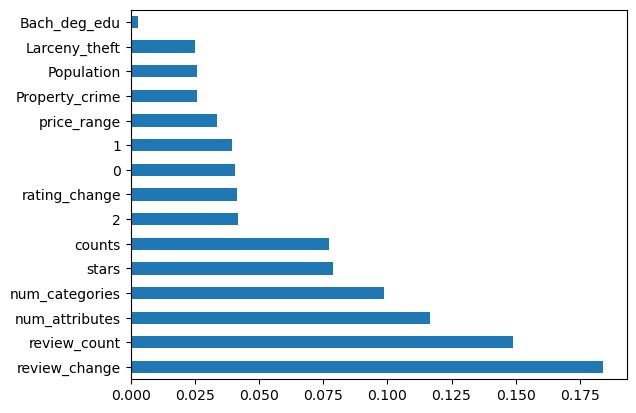

In [65]:
#find the top 15 important features
fi_model = ExtraTreesClassifier()
fi_model.fit(X, y.values.ravel())
print(fi_model.feature_importances_)
feat_importances = pd.Series(fi_model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

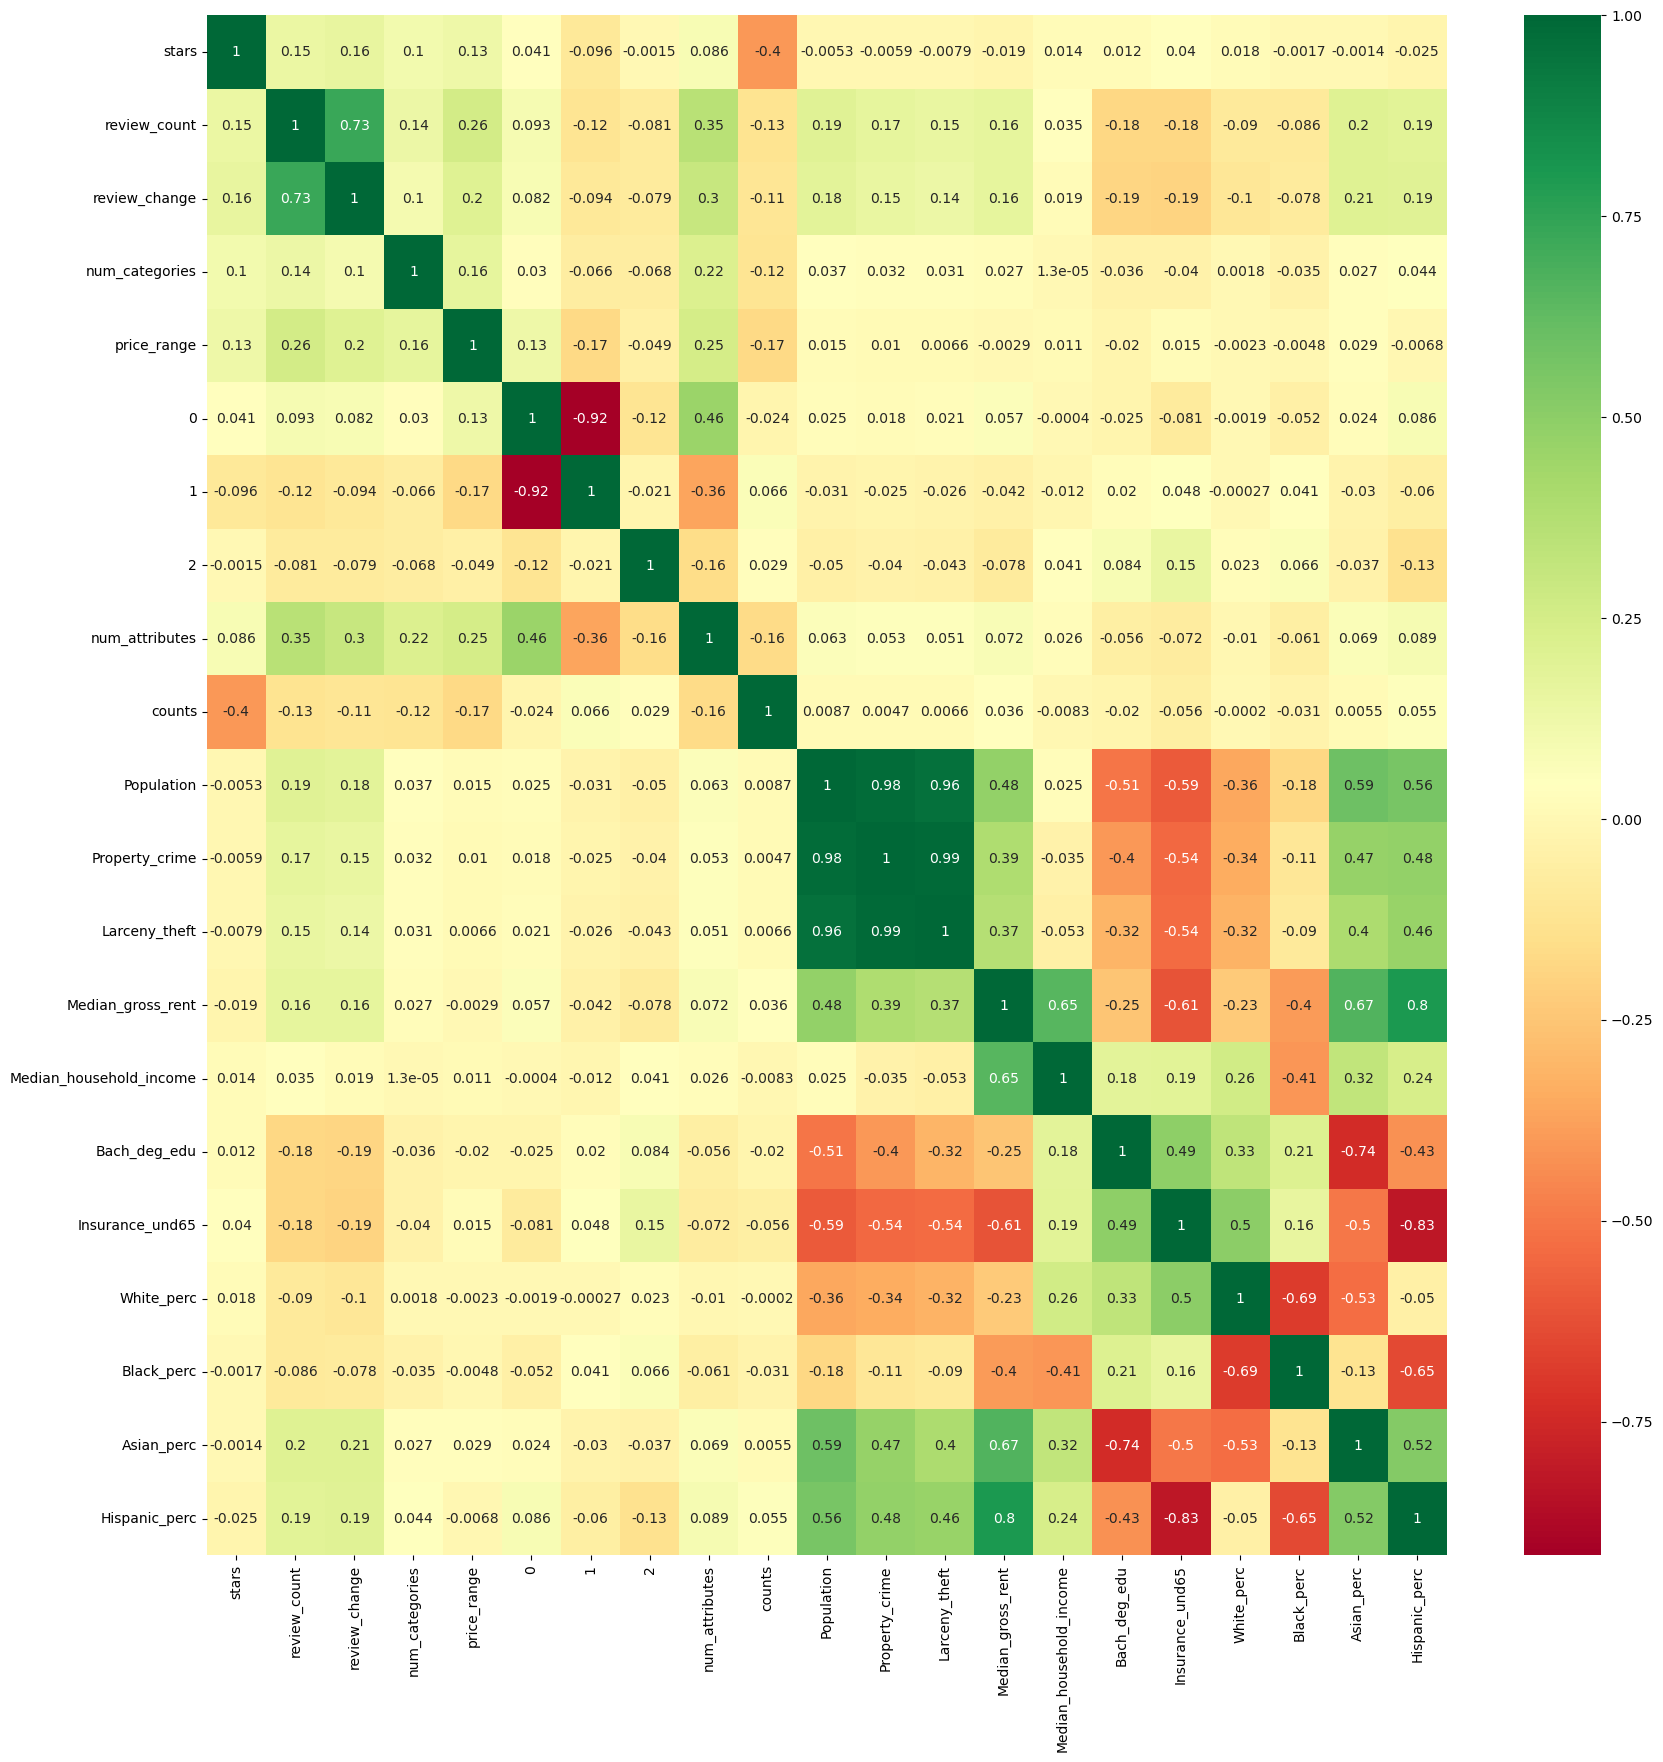

In [66]:
# correlation heat map
corr = X.corr()
top_corr_features = corr.index
plt.figure(figsize = (20,20))
g=sns.heatmap(X[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Model Selection

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, recall_score, precision_score, f1_score

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [69]:
# Logistic Regression
def logireg(X_train, X_test, y_train, y_test):
    logireg = LogisticRegression(max_iter=1000)
    logireg.fit(X_train, y_train.values.ravel())
    prediction = logireg.predict(X_test)
    logireg_scores = roc_auc_score(y_test, logireg.predict_proba(X_test)[:, 1])
    return logireg_scores

# Random Forest Classifier
def rf(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(random_state=0)
    rf.fit(X_train,y_train.values.ravel())
    prediction = rf.predict(X_test)
    rf_scores = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
    return rf_scores


# Ridge
def ridge(X_train, X_test, y_train, y_test):
    ridge = RidgeClassifier()
    ridge.fit(X_train, y_train.values.ravel())
    prediction = ridge.predict(X_test)
    ridge_scores = roc_auc_score(y_test, ridge.predict_proba(X_test)[:, 1])
    return ridge_scores


# k Nearest Neighbor
def knn(X_train, X_test, y_train, y_test):
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train.values.ravel())
    prediction = knn.predict(X_test)
    knn_scores = roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1])
    return knn_scores


# Support Vector
def svc(X_train, X_test, y_train, y_test):
    svc = SVC(probability=True)
    svc.fit(X_train, y_train.values.ravel())
    prediction = svc.predict(X_test)
    svc_scores = roc_auc_score(y_test, svc.predict_proba(X_test)[:, 1])
    return svc_scores


# XGBoost Classifier
def xgb_cl(X_train, X_test, y_train, y_test):
    xbg_cl = xgb.XGBClassifier(random_state=0, n_estimators = 50)
    xbg_cl.fit(X_train,y_train.values.ravel())
    xg_preds = xbg_cl.predict(X_test)
    xg_scores = roc_auc_score(y_test, xbg_cl.predict_proba(X_test)[:, 1])
    return xg_scores


# GradientBoostingClassifier
def gbc(X_train, X_test, y_train, y_test):
    gbc = GradientBoostingClassifier(random_state=0, n_estimators = 50)
    gbc.fit(X_train,y_train.values.ravel())
    gra_preds = gbc.predict(X_test)
    gra_scores = roc_auc_score(y_test, gbc.predict_proba(X_test)[:, 1])
    return gra_scores


# Ada Boost Classifier
def ada(X_train, X_test, y_train, y_test):
    ada_c = AdaBoostClassifier(random_state=0, n_estimators = 50)
    ada_c.fit(X_train,y_train.values.ravel())
    ada_preds = ada_c.predict(X_test)
    ada_scores = roc_auc_score(y_test, ada_c.predict_proba(X_test)[:, 1])
    return ada_scores


# Multi-layer Perceptron
def mlp(X_train, X_test, y_train, y_test):
    mlp_c = MLPClassifier(random_state=1, max_iter=700, activation = 'tanh').fit(X_train, y_train.values.ravel())
    predictions=mlp_c.predict(X_test)
    mlp_scores = roc_auc_score(y_test, mlp_c.predict_proba(X_test)[:, 1])
    return mlp_scores

In [70]:
# Normalizing the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)

In [72]:
print(f"Roc-auc score for RF: {rf(X_train_transformed, X_test_transformed, y_train, y_test)}.")
print(f"Roc-auc score for Logistic regression: {logireg(X_train_transformed, X_test_transformed, y_train, y_test)}.")
print(f"Roc-auc score for KNN: {knn(X_train_transformed, X_test_transformed, y_train, y_test)}.")
print(f"Roc-auc score for SVM: {svc(X_train_transformed, X_test_transformed, y_train, y_test)}.")
print(f"Roc-auc score for XGBoost: {xgb_cl(X_train_transformed, X_test_transformed, y_train, y_test)}.")
print(f"Roc-auc score for GB: {gbc(X_train_transformed, X_test_transformed, y_train, y_test)}.")
print(f"Roc-auc score for Ada: {ada(X_train_transformed, X_test_transformed, y_train, y_test)}.")
print(f"Roc-auc score for MLP: {mlp(X_train_transformed, X_test_transformed, y_train, y_test)}.")

Roc-auc score for RF: 0.8452957941330035.
Roc-auc score for Logistic regression: 0.6958560997320689.
Roc-auc score for KNN: 0.6077368065740157.
Roc-auc score for SVM: 0.7833724089538044.
Roc-auc score for XGBoost: 0.8418359112157563.
Roc-auc score for GB: 0.8240373817893198.
Roc-auc score for Ada: 0.7998551707854034.
Roc-auc score for MLP: 0.784935101214171.


Among the models, random forest had the highest roc-auc score.

## Hyperparameter Tunning

In [ ]:
param_grid = { 
    'n_estimators': [50, 100, 150, 250, 500, 600, 700],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2, 4, 8, 16, 36, 64],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train.values.ravel())
CV_rfc.best_params_

In [73]:
rf = RandomForestClassifier(random_state = 0, max_depth = 64, n_estimators = 600)
rf.fit(X_train,y_train.values.ravel())
prediction = rf.predict(X_test)
probs = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
probs

0.8511342460954864

## Best Model Results Visualization

In [74]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

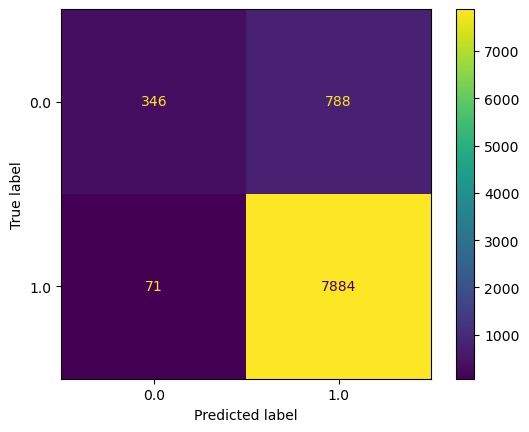

In [75]:
cm = confusion_matrix(y_test, prediction, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf.classes_)
disp.plot()
plt.show()
disp.figure_.savefig('conf_matrix.png')

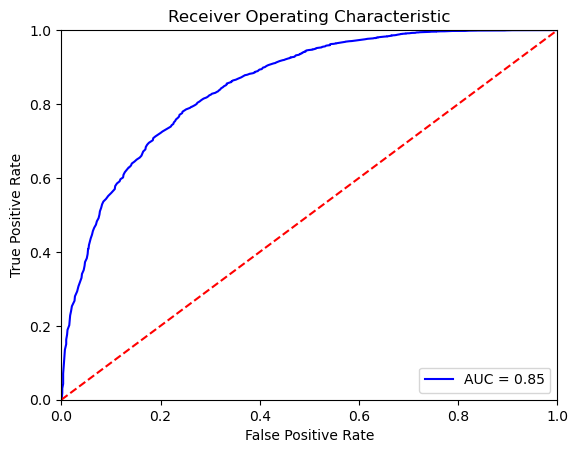

In [76]:
import sklearn.metrics as metrics

probs = rf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()